In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy.stats import norm

In [2]:
belize_df = pd.read_csv("belize_airbnb_listings.csv")
belize_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364


## 1. Why is assuming normal data an important consideration when answering questions about probability?

In technical terms, the Assumption of Normality claims that the sampling distribution of the mean is normal or that the distribution of means across samples is normal. In normal distribution, mean, mode and medium are all the same or close enough. In graph form, normal distribution will appear as a bell curve.We just mean and standard deviation from the distribution to run statistical tests.

## 2. Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data

### a.	How do you choose your bin size?

Bin size was selected using Sturges' Rule : k = log2n + 1

In [12]:
month_rev = int(np.ceil(np.log2(len(belize_df["reviews_per_month"]))) + 1)
num_rev = int(np.ceil(np.log2(len(belize_df["number_of_reviews"]))) + 1)

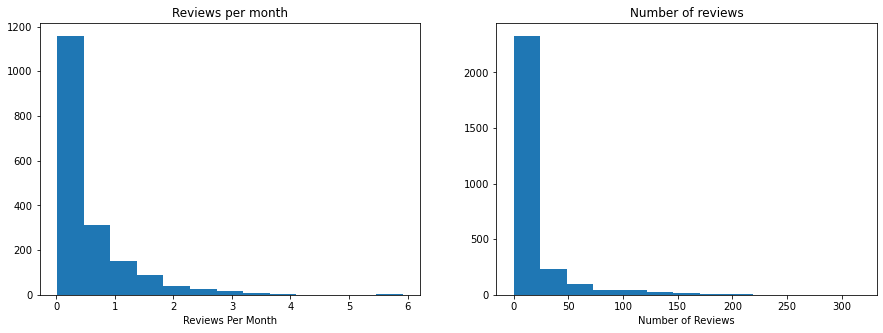

In [20]:
fig, ax = plt.subplots(1, 2,figsize=(15,5))

ax[0].hist(x='reviews_per_month', data=belize_df, bins=month_rev)
ax[1].hist(x='number_of_reviews', data=belize_df, bins=num_rev)

ax[0].set_xlabel('Reviews Per Month')
ax[0].set_title('Reviews per month')

ax[1].set_xlabel('Number of Reviews')
ax[1].set_title('Number of reviews')

plt.show()

## 3.Create a box and whisker plot for availability_365. What does this show you?

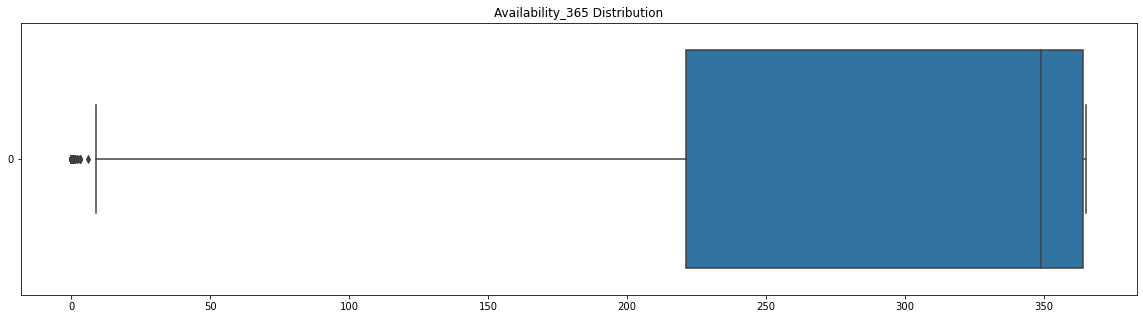

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=belize_df["availability_365"], orient='h')
plt.title("Availability_365 Distribution")
plt.show()

In [9]:
belize_df["availability_365"].describe()

count    2796.000000
mean      280.315451
std       120.617632
min         0.000000
25%       221.000000
50%       349.000000
75%       364.000000
max       365.000000
Name: availability_365, dtype: float64

- Availability distribution is pretty wide as it ranged from 0 to 365.

- The box plot is left skewed and there's outlier below the lower quartile

- Most the availability are closer around the right of the median compared to availability left of the median.
  This mean most properties are available to 365 days a year


## 4. What is the probability that the price for an Airbnb is under $50?

In [21]:
norm.cdf(50,belize_df["price"].mean(),belize_df["price"].std())
# 29%

0.29275508850857496

### a. What do you notice about these records? Hint: look at the other columns.

In [21]:
belize_df[belize_df['price']<50][["neighbourhood_group","room_type"]].value_counts()

neighbourhood_group  room_type      
Belize               Private room       13
Cayo                 Entire home/apt    11
Stann Creek          Private room        6
Cayo                 Private room        6
Belize               Shared room         5
Cayo                 Shared room         4
Toledo               Private room        2
Orange Walk          Entire home/apt     1
Belize               Entire home/apt     1
dtype: int64

- The properties available for below 50 dollars are mostly from the neighbourhood of Cayo and Belize.
- The property room type available for 50 dollars are private room in Belize and entire home/apt in Cayo

### b. What distribution does this data most closely fit?

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

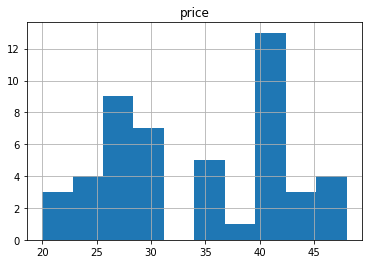

In [53]:
belize_df[belize_df['price'] < 50].hist('price')

This distribution is bimodal

## 5.	Calculate the sample variance and standard deviation for all the numerical columns in the same output.

In [39]:
belize_df.agg([np.std,np.var]).drop(columns=['id', 'host_id'])

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
std,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
var,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157


### a.	Why sample variance and not population variance?
This dataset is sample so that's why we are using sample variance to estimate for the population data

### b.	What is your takeaway for each metric?

Variance is the average squared deviations from the mean, while standard deviation is the square root of this number.
The standard deviation of price is 563.124 while the variance is 317109.59 which doesn't tell us much. 

Standard deviation is useful because the shape of a normal curve is determined by its mean and standard deviation. The standard deviation tells you how skinny or wide the curve will be. 

It's also the most robust form of spread or varaibility

### c.	What are the scales of measurement for each of these values? 

- latitude- Interval scale
- longitude- Interval scale
- price-Ratio Scale
- minimum_nights-Ratio Scale
- number_of_review-Ratio Scale
- reviews_per_month-Ratio Scale
- calculated_host_listings_count-Rate Scale
- availability_365-Ratio Scale

### 6.	What percent of Airbnb listings in Belize are available 360 days a year or more?

In [46]:
len(belize_df[belize_df['availability_365'] >= 360])/len(belize_df['availability_365'])*100
#about 40%

39.52074391988555

### a.360 days or less?

In [50]:
len(belize_df[belize_df['availability_365'] <= 360])/len(belize_df['availability_365'])*100
#about 62%

61.55221745350501

### b.	What distribution does this data most closely fit?

array([[<AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

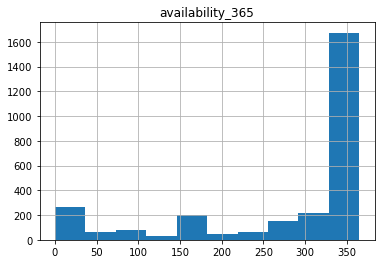

In [52]:
belize_df.hist('availability_365')

### 7.	What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [55]:
np.percentile(belize_df['minimum_nights'], 25)

1.0

### Monty Hall problem

In a game show,yhere are three doors available - one has a car behind it and the other two have goats behind it.
Once we pick a door, the host - Monty Hall - opens another door to reveal a goat behind it and gives us the offer to switch doors to the final available door.Assume we pick Door 1. Should we switch doors? Does it make a difference?

Assume we pick Door 1. Should we switch doors? Does it make a difference? Let’s start simple. With three doors and
two outcomes, how many possible scenarios are there? (Order does not matter)

This is a combination problem. 3! / (2!)(1!) = 3. There are three scenarios


Assume Monty picks Door 3. The probability of Door 1 having the car and Monty pulling Door 3 is ⅙
The probability of Monty pulling Door 3 is 0.5. Thus the probability of Door 1 having the
car given that Monty pulls Door 3 is ⅓!! Thus you should switch

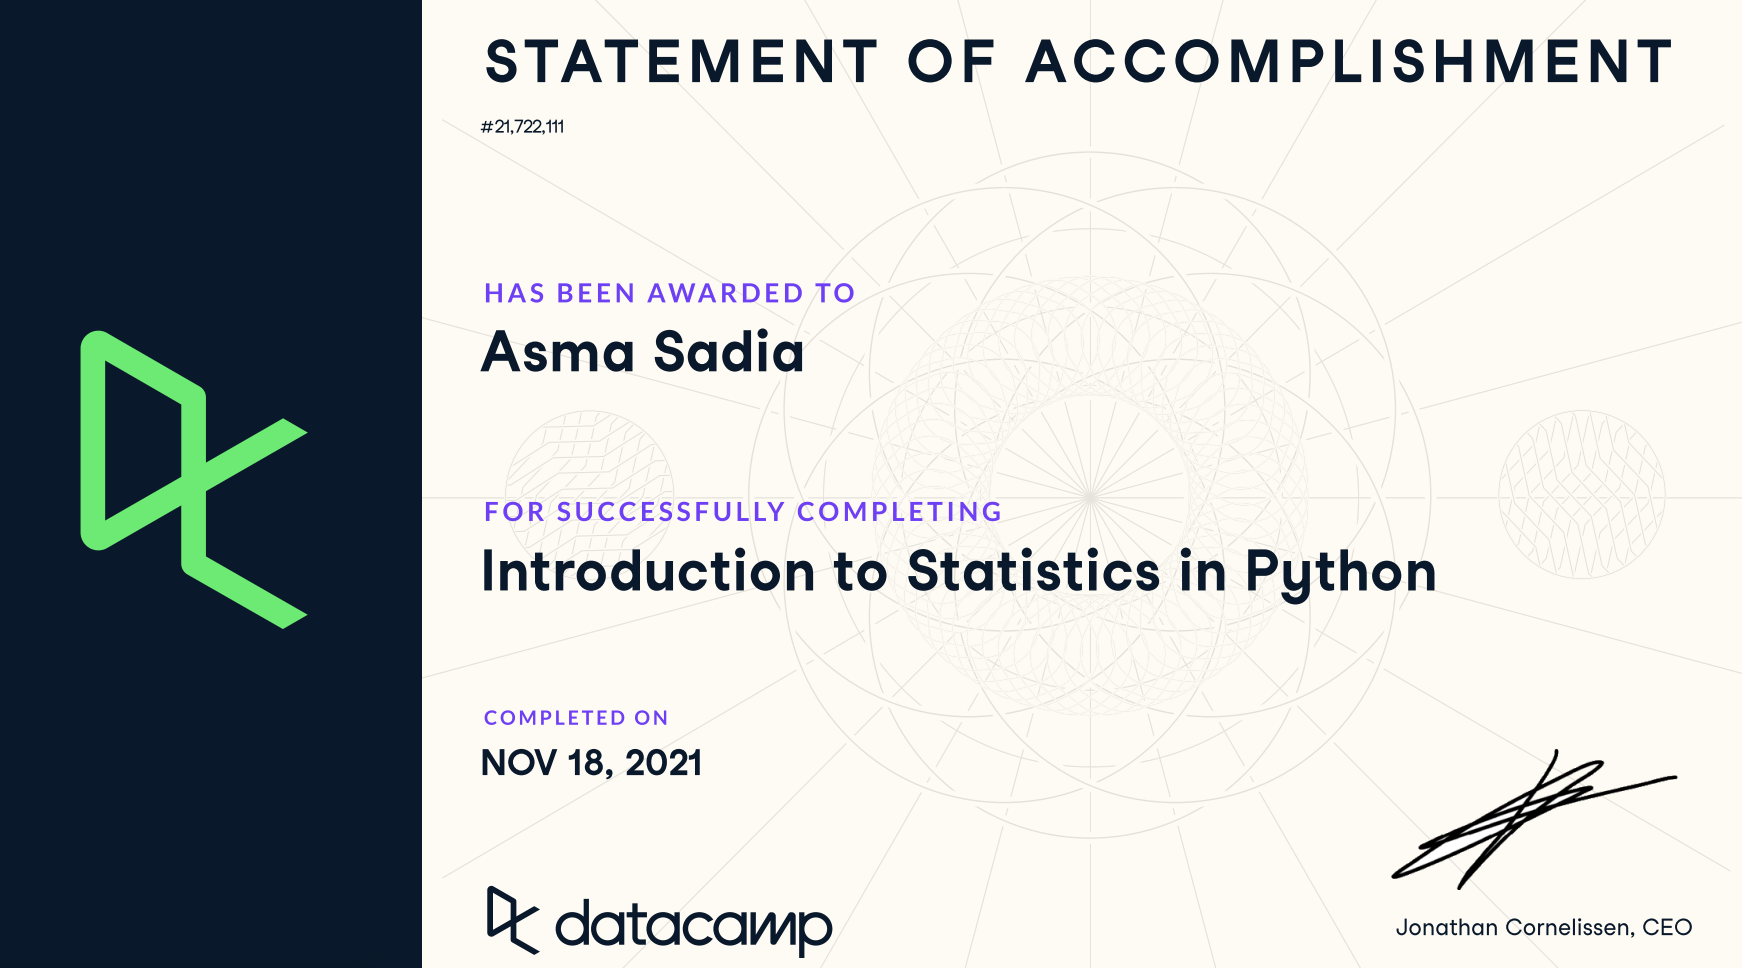